In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import math


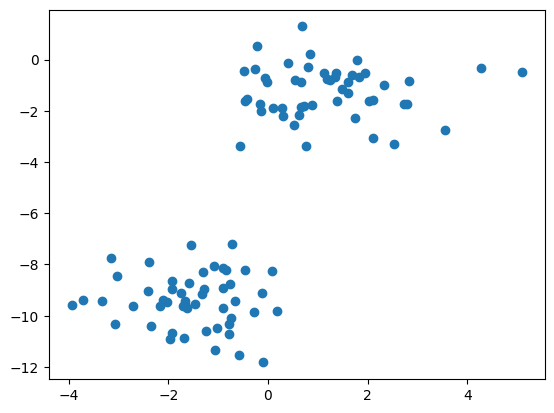

In [17]:
x, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=2)
plt.scatter(x[:,0],x[:,1])

In [18]:
# augment X with a column of ones
X = np.hstack((np.ones((x.shape[0],1)),x))

In [34]:
def exp(x):
  try:
    answer = math.exp(x)
  except OverflowError:
	  answer = float('inf')
  return answer


In [35]:
def logistic(z):
  if(exp((-1)*z) == float('inf')):
    return 0.00001
  else: return (1 + exp((-1)*z))**(-1)

In [30]:
# cross entropy loss
def crossEntropyLoss(w):
    sum = 0
    # y_pred = logistic(np.dot(w.T, X))
    # return sum(y*math.log(y_pred) + (1 - y)*math.log(1 - y_pred + 1e-35))
    
    for i in range(100):
        x = np.array(X[i,:]).reshape(-1,1)
        y_pred = logistic(np.dot(w.T, x)[0])
        sum += y[i]*math.log(y_pred) + (1 - y[i])*math.log(1 - y_pred + 1e-35)
    return -sum

In [26]:
# least mean square loss
def leastMeanSquare(w):
  sum = 0
  for i in range(100):
    X = np.array(X[i, :]).reshape(-1, 1)
    sum += (y[i] - logistic((np.dot(w.T, X)[0])))**2
  return sum


In [27]:
# gradient vector
def gradient(w):
  sum = 0
  
  for i in range(100):
    X = np.array(X[i, :]).reshape(-1, 1)
    y_pred = logistic(np.dot(w.T, X)[0])
    sum += (1-y_pred) * y[i]*X - (1 - y[i])*y_pred*X
  return (-1)*sum


In [28]:
# gradient vector for lms loss
def gradient_lms(w):
  # sum = 0
  y_pred = logistic(np.dot(w.T, X))
  # sum = 2*(y_pred - y) * y_pred*(1 - y_pred)*X
  
  # for i in range(100):
  #   X = np.array(X[i, :]).reshape(-1, 1)
  #   y_pred = logistic(np.dot(w.T, X)[0])
  #   sum += 2*(y_pred - y[i]) * y_pred*(1 - y_pred)*X
  return sum(2*(y_pred - y) * y_pred*(1 - y_pred)*X)


In [52]:
#Gradient descent algorithm with constant step size ( cross entropy)
c = np.zeros((3,1))
w_k1 = np.random.rand(3,1)                                         #initial values
# w_k1 = np.array([6,5,-6]).reshape(-1,1)                                         #initial values
w_k = c 
e = 10**(-2)
iter = 0     
likes = []
last_val = 0                                                                               
while(abs(last_val - np.linalg.norm(crossEntropyLoss(w_k1))) > e):                                             #stopping criteria
   w_k = w_k1
   last_val = np.linalg.norm(crossEntropyLoss(w_k1))
   w_k1 = w_k1 - 0.1*(w_k)                                                     #constant step size              
   iter = iter + 1 
   if (iter%10==0):
      print("iter = %d, loss = %f" %(iter, last_val))
   likes.append(last_val)                                                        #storing likelihood for plotting 
   
print("The optimal 'w' is: ")
print(w_k1)
print("The minimal loss is:")
print(crossEntropyLoss(w_k1))
print("number of iterations required : %d" %iter)

iter = 10, loss = 34.918535
iter = 20, loss = 50.328476
iter = 30, loss = 61.561609
iter = 40, loss = 66.467446
iter = 50, loss = 68.304340
iter = 60, loss = 68.960280
iter = 70, loss = 69.190873
The optimal 'w' is: 
[[0.00027348]
 [0.00028142]
 [0.00030542]]
The minimal loss is:
69.2334318777295
number of iterations required : 73


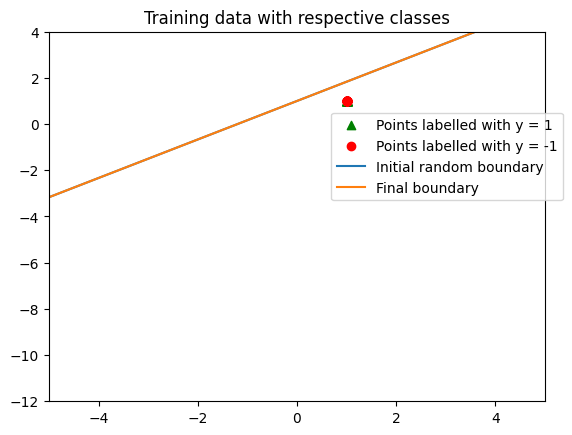

In [12]:
# plot of classification of trained data
def boundary(x, w):
  return (-1)*(w[0] + w[1]*x)/w[2]  # defining boundary function


class1 = []
class2 = []  # classes
for i in range(100):
  if (y[i] == 1):
    class1.append(X[i, 1:3])
  else:
    class2.append(X[i, 1:3])
class1 = np.array(class1)
plt.scatter(class1[:, 0], class1[:, 1], c='green',
            marker='^', label='Points labelled with y = 1')
class2 = np.array(class2)
plt.scatter(class2[:, 0], class2[:, 1], c='red',
            marker='o', label='Points labelled with y = -1')
x = np.linspace(-6, 5)
plt.plot(x, boundary(x, np.array(
    [6, 5, -6]).reshape(-1, 1)), label='Initial random boundary')
plt.plot(x, boundary(x, w_k1), label='Final boundary')
plt.legend(bbox_to_anchor=(1.05, 0.8))
plt.xlim(-5, 5)
plt.ylim(-12, 4)
plt.title("Training data with respective classes")
plt.show()


In [13]:
#Gradient descent algorithm with constant step size for lms loss 
c = np.zeros((3,1))
w_k1 = np.array([10,10,1]).reshape(-1,1)                                         #initial values
w_k = c 
e = 10**(-4)
iter = 0     
likes = []                                                                                     
while(np.linalg.norm(leastMeanSquare(w_k1)) > e):                                            #stopping criteria
   w_k = w_k1
   w_k1 = w_k1 - gradient_lms(w_k)                                               #constant step size              
   iter = iter + 1 
   #likes.append(l(w_k1))                                                        #storing likelihood for plotting 
print("The optimal 'w' is: ")
print(w_k1)
print("The optimal likelihood is:")
print(leastMeanSquare(w_k1))
print("number of iterations required : %d" %iter)

KeyboardInterrupt: 

In [ ]:
# plot of classification of trained data
def boundary(x, w):
  return (-1)*(w[0] + w[1]*x)/w[2]  # defining boundary function


class1 = []
class2 = []  # classes
for i in range(100):
  if (y[i] == 1):
    class1.append(Aug_data[i, 1:3])
  else:
    class2.append(Aug_data[i, 1:3])
class1 = np.array(class1)
plt.scatter(class1[:, 0], class1[:, 1], c='green',
            marker='^', label='Points labelled with y = 1')
class2 = np.array(class2)
plt.scatter(class2[:, 0], class2[:, 1], c='red',
            marker='o', label='Points labelled with y = -1')
x = np.linspace(-6, 5)
plt.plot(x, boundary(x, np.array(
    [10, 10, 1]).reshape(-1, 1)), label='Initial random boundary')
plt.plot(x, boundary(x, w_k1), label='Final boundary')
plt.legend(bbox_to_anchor=(1.05, 0.8))
plt.xlim(-5, 5)
plt.ylim(-12, 4)
plt.title("Training data with respective classes")
plt.show()
